## 'ENSG00000168484.8'

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pylab as plt
%matplotlib inline

In [2]:
FILE_ROOT = '/storage/dana/spliceSTR/expression/'

In [5]:
gene = 'ENSG00000168484.8'

---
# Percent Spliced In (PSI) calculations
---

In [3]:
exon_df = pd.read_table(FILE_ROOT + 'GTEx_Data_20150112_RNAseq_RNASeQCv1.1.8_exon_reads.lung.txt',index_col=0)

In [7]:
exon_df

,GTEX-1117F-0226-SM-5GZZ7,GTEX-1117F-0426-SM-5EGHI,GTEX-1117F-0626-SM-5N9CS,GTEX-14DAR-0226-SM-5S2PR,GTEX-139T6-0426-SM-5IJEM,GTEX-111CU-0326-SM-5GZXO,GTEX-YFC4-1126-SM-5RQJN,GTEX-TML8-0326-SM-4GICN,GTEX-111FC-1126-SM-5GZWU,GTEX-14E7W-1326-SM-5RQIV,...,GTEX-T5JC-0826-SM-32PMC,GTEX-YEC3-0226-SM-5IFJO,GTEX-1399S-1726-SM-5L3DI,GTEX-YEC4-0526-SM-4W21U,GTEX-T6MN-0826-SM-32PM4,GTEX-1399U-0826-SM-5KM1P,GTEX-T6MO-0426-SM-32QOI,GTEX-YECK-0926-SM-4W214,GTEX-T8EM-0326-SM-3DB7F,GTEX-YF7O-0626-SM-4W21R
Id,,,,,,,,,,,,,,,,,,,,,
ENSG00000000003.10_0,1106.46,156.21,1344.38,311.13,714.91,615.25,447.13,572.84,685.09,416.03,...,334.25,545.45,546.72,1526.91,376.76,1320.45,545.68,1341.22,1290.25,714.58
ENSG00000000003.10_1,163.18,26.85,181.70,51.46,99.61,82.91,66.91,71.76,89.20,65.61,...,59.63,65.83,88.91,207.00,71.99,171.38,82.34,157.10,213.82,91.29
ENSG00000000003.10_2,97.53,18.54,123.89,31.09,66.18,57.99,33.60,56.68,82.93,29.96,...,32.20,49.58,47.65,155.18,34.62,118.91,56.85,93.80,128.38,65.42
ENSG00000000003.10_3,167.22,35.20,228.74,52.74,101.53,114.87,81.32,92.80,118.80,59.82,...,36.87,100.39,107.04,198.51,49.99,177.15,70.01,162.97,239.04,100.30
ENSG00000000003.10_4,121.17,22.08,162.87,37.30,89.53,82.84,56.10,55.20,88.93,44.68,...,33.87,71.11,66.92,139.74,41.53,119.59,67.30,119.42,156.12,86.70
ENSG00000000003.10_5,100.76,21.46,112.96,35.37,59.58,52.51,46.30,41.49,66.59,39.10,...,26.46,42.95,45.35,92.67,29.99,94.55,51.08,82.61,109.64,53.10
ENSG00000000003.10_6,176.34,33.41,230.78,45.67,120.24,93.99,85.12,92.11,85.01,59.80,...,47.43,82.95,86.24,138.91,54.35,163.04,85.29,128.90,214.40,112.92
ENSG00000000003.10_7,206.33,44.25,220.68,49.24,154.43,100.64,63.51,90.12,83.43,51.00,...,32.29,128.75,118.17,147.79,63.78,185.62,72.43,178.97,148.35,115.68
ENSG00000000003.10_8,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [17]:
PSI_df = pd.read_csv('/storage/dana/spliceSTR/PSI/14_PSI.csv')

In [18]:
PSI_df

,Unnamed: 0,ENSG00000176294.3_5,ENSG00000136319.7_3,ENSG00000136319.7_6,ENSG00000136319.7_7,ENSG00000136319.7_8,ENSG00000136319.7_9,ENSG00000136319.7_10,ENSG00000136319.7_11,ENSG00000136319.7_12,...,ENSG00000185347.13_6,ENSG00000184986.6_1,ENSG00000184986.6_3,ENSG00000226777.3_0,ENSG00000226777.3_1,ENSG00000226777.3_2,ENSG00000226777.3_3,ENSG00000226777.3_4,ENSG00000226777.3_5,ENSG00000226777.3_6
0,GTEX-1117F,0.0,100.000000,100.0,100.0,100.0,100.0,100.00000,100.0,5.718870,...,20.634513,100.000000,100.0,0.0,0.0,0.000000,0.0,0.0,0.0,100.0
1,GTEX-111CU,0.0,100.000000,100.0,100.0,100.0,100.0,100.00000,100.0,7.894425,...,17.694487,100.000000,100.0,0.0,100.0,0.000000,0.0,0.0,100.0,100.0
2,GTEX-111FC,0.0,100.000000,100.0,100.0,100.0,100.0,100.00000,100.0,15.691808,...,63.848912,100.000000,100.0,100.0,100.0,0.000000,100.0,100.0,100.0,100.0
3,GTEX-111VG,0.0,100.000000,100.0,100.0,100.0,100.0,100.00000,100.0,20.829678,...,13.863675,100.000000,100.0,100.0,100.0,0.000000,100.0,100.0,100.0,100.0
4,GTEX-111YS,0.0,100.000000,100.0,100.0,100.0,100.0,100.00000,100.0,6.908122,...,36.458045,0.000000,100.0,0.0,0.0,0.000000,0.0,0.0,0.0,100.0
5,GTEX-1122O,0.0,100.000000,100.0,100.0,100.0,100.0,100.00000,100.0,6.714988,...,42.788501,0.000000,100.0,100.0,100.0,21.147333,100.0,100.0,100.0,100.0
6,GTEX-1128S,0.0,100.000000,100.0,100.0,100.0,100.0,100.00000,100.0,24.193291,...,14.358860,100.000000,100.0,100.0,100.0,0.000000,100.0,100.0,100.0,100.0
7,GTEX-117YW,0.0,100.000000,100.0,100.0,100.0,100.0,100.00000,100.0,6.501613,...,25.013343,100.000000,100.0,100.0,100.0,0.000000,100.0,100.0,100.0,100.0
8,GTEX-117YX,0.0,100.000000,100.0,100.0,100.0,100.0,100.00000,100.0,4.745364,...,42.938949,0.000000,100.0,100.0,100.0,0.000000,100.0,100.0,100.0,100.0
9,GTEX-11DXX,0.0,100.000000,100.0,100.0,100.0,100.0,100.00000,100.0,6.667656,...,31.546894,100.000000,100.0,100.0,100.0,0.000000,100.0,0.0,0.0,100.0


In [7]:
gene_df = exon_df.loc[exon_df.index.str.startswith(gene)]
exons = list(gene_df.index)
exons.sort()
gene_df

,GTEX-1117F-0226-SM-5GZZ7,GTEX-1117F-0426-SM-5EGHI,GTEX-1117F-0626-SM-5N9CS,GTEX-14DAR-0226-SM-5S2PR,GTEX-139T6-0426-SM-5IJEM,GTEX-111CU-0326-SM-5GZXO,GTEX-YFC4-1126-SM-5RQJN,GTEX-TML8-0326-SM-4GICN,GTEX-111FC-1126-SM-5GZWU,GTEX-14E7W-1326-SM-5RQIV,...,GTEX-T5JC-0826-SM-32PMC,GTEX-YEC3-0226-SM-5IFJO,GTEX-1399S-1726-SM-5L3DI,GTEX-YEC4-0526-SM-4W21U,GTEX-T6MN-0826-SM-32PM4,GTEX-1399U-0826-SM-5KM1P,GTEX-T6MO-0426-SM-32QOI,GTEX-YECK-0926-SM-4W214,GTEX-T8EM-0326-SM-3DB7F,GTEX-YF7O-0626-SM-4W21R
Id,,,,,,,,,,,,,,,,,,,,,
ENSG00000168484.8_0,0.00,0.00,0.00,0.00,2.00,0.00,0.00,2.00,0.00,0.00,...,0.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
ENSG00000168484.8_1,0.00,0.00,0.41,254.00,87.18,9.74,0.00,97.86,0.00,0.64,...,1.74,467.33,176.10,328.70,5.58,363.25,19.13,2.00,165.93,280.59
ENSG00000168484.8_2,1.58,1.57,0.59,44711.81,10533.92,2549.98,115.16,32029.49,232.15,1683.23,...,569.93,75092.42,28976.32,45257.68,498.00,24543.81,5124.85,939.94,48004.39,85531.36
ENSG00000168484.8_3,2.89,4.63,3.22,303063.28,56949.16,13961.56,596.71,147937.06,1013.87,7305.69,...,2408.31,397254.84,142684.14,247604.81,2187.38,125073.01,18072.44,5013.23,179190.23,452444.69
ENSG00000168484.8_4,6.25,7.13,0.78,282385.69,58019.84,13067.81,634.71,152248.89,1180.29,7951.19,...,2891.55,390359.44,130694.40,278463.22,2612.92,126571.09,20916.49,5480.78,213682.33,466562.53
ENSG00000168484.8_5,9.28,22.67,2.00,812399.00,164769.31,40652.93,2334.92,476229.03,4331.15,26278.25,...,17789.43,1193607.75,356128.22,1010729.56,13356.22,415292.38,55796.55,24219.35,572804.38,1431275.50


In [4]:
junction_df = pd.read_table(FILE_ROOT + 'GTEx_Data_20150112_RNAseq_Flux1.6_junction_reads.lung.txt',
                              index_col=0,
                              sep='\t',
                              skipinitialspace=True)

/usr/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [17]:
junction_df

,Gene_Symbol,Chr,GTEX-1117F-0226-SM-5GZZ7,GTEX-111CU-0326-SM-5GZXO,GTEX-111FC-1126-SM-5GZWU,GTEX-111VG-0726-SM-5GIDC,GTEX-111YS-0626-SM-5GZXV,GTEX-1122O-0126-SM-5GICA,GTEX-1128S-0726-SM-5N9D6,GTEX-117YW-0526-SM-5H11C,...,GTEX-ZXG5-0826-SM-5GID6,GTEX-ZY6K-0326-SM-5SIBB,GTEX-ZYFG-0226-SM-5GIDT,GTEX-ZYT6-0526-SM-5GIEA,GTEX-ZYVF-1726-SM-5E443,GTEX-ZYW4-1526-SM-5SIBA,GTEX-ZYWO-0826-SM-5E45W,GTEX-ZYY3-0926-SM-5E454,GTEX-ZZPT-1326-SM-5E43H,GTEX-ZZPU-0526-SM-5E44U
TargetID,,,,,,,,,,,,,,,,,,,,,
10_100008748_100010822,ENSG00000138131.3,10,38.0,7.0,10.0,22.0,11.0,21.0,11.0,15.0,...,15.0,6.0,8.0,31.0,9.0,19.0,6.0,13.0,34.0,10.0
10_100010933_100011323,ENSG00000138131.3,10,32.0,9.0,19.0,19.0,6.0,6.0,9.0,10.0,...,14.0,7.0,11.0,18.0,13.0,21.0,6.0,14.0,33.0,10.0
10_100011459_100012110,ENSG00000138131.3,10,36.0,8.0,11.0,10.0,10.0,8.0,2.0,5.0,...,16.0,7.0,18.0,14.0,18.0,17.0,4.0,14.0,29.0,10.0
10_100011959_100015345,ENSG00000230928.1,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10_100012225_100013310,ENSG00000138131.3,10,41.0,8.0,19.0,12.0,14.0,14.0,11.0,8.0,...,16.0,5.0,13.0,26.0,13.0,17.0,6.0,20.0,25.0,18.0
10_100013553_100015334,ENSG00000138131.3,10,21.0,3.0,13.0,10.0,8.0,6.0,5.0,6.0,...,15.0,4.0,11.0,10.0,5.0,13.0,2.0,15.0,23.0,6.0
10_100015496_100016537,ENSG00000138131.3,10,27.0,6.0,12.0,7.0,21.0,3.0,10.0,10.0,...,13.0,4.0,6.0,15.0,7.0,6.0,2.0,14.0,18.0,10.0
10_100016704_100017407,ENSG00000138131.3,10,20.0,5.0,17.0,11.0,8.0,7.0,2.0,9.0,...,14.0,1.0,5.0,16.0,7.0,11.0,3.0,7.0,23.0,13.0
10_100017561_100017738,ENSG00000138131.3,10,15.0,7.0,11.0,18.0,6.0,8.0,7.0,5.0,...,14.0,0.0,4.0,10.0,6.0,11.0,4.0,7.0,14.0,5.0


In [18]:
common_samples = list(junction_df.columns.intersection(exon_df.columns))
exon_df = exon_df[common_samples]
common_samples[:0] = ['Gene_Symbol','Chr']
junction_df = junction_df[common_samples]

In [20]:
junction_df

,Gene_Symbol,Chr,GTEX-1117F-0226-SM-5GZZ7,GTEX-111CU-0326-SM-5GZXO,GTEX-111FC-1126-SM-5GZWU,GTEX-111VG-0726-SM-5GIDC,GTEX-111YS-0626-SM-5GZXV,GTEX-1122O-0126-SM-5GICA,GTEX-1128S-0726-SM-5N9D6,GTEX-117YW-0526-SM-5H11C,...,GTEX-ZXG5-0826-SM-5GID6,GTEX-ZY6K-0326-SM-5SIBB,GTEX-ZYFG-0226-SM-5GIDT,GTEX-ZYT6-0526-SM-5GIEA,GTEX-ZYVF-1726-SM-5E443,GTEX-ZYW4-1526-SM-5SIBA,GTEX-ZYWO-0826-SM-5E45W,GTEX-ZYY3-0926-SM-5E454,GTEX-ZZPT-1326-SM-5E43H,GTEX-ZZPU-0526-SM-5E44U
TargetID,,,,,,,,,,,,,,,,,,,,,
10_100008748_100010822,ENSG00000138131.3,10,38.0,7.0,10.0,22.0,11.0,21.0,11.0,15.0,...,15.0,6.0,8.0,31.0,9.0,19.0,6.0,13.0,34.0,10.0
10_100010933_100011323,ENSG00000138131.3,10,32.0,9.0,19.0,19.0,6.0,6.0,9.0,10.0,...,14.0,7.0,11.0,18.0,13.0,21.0,6.0,14.0,33.0,10.0
10_100011459_100012110,ENSG00000138131.3,10,36.0,8.0,11.0,10.0,10.0,8.0,2.0,5.0,...,16.0,7.0,18.0,14.0,18.0,17.0,4.0,14.0,29.0,10.0
10_100011959_100015345,ENSG00000230928.1,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10_100012225_100013310,ENSG00000138131.3,10,41.0,8.0,19.0,12.0,14.0,14.0,11.0,8.0,...,16.0,5.0,13.0,26.0,13.0,17.0,6.0,20.0,25.0,18.0
10_100013553_100015334,ENSG00000138131.3,10,21.0,3.0,13.0,10.0,8.0,6.0,5.0,6.0,...,15.0,4.0,11.0,10.0,5.0,13.0,2.0,15.0,23.0,6.0
10_100015496_100016537,ENSG00000138131.3,10,27.0,6.0,12.0,7.0,21.0,3.0,10.0,10.0,...,13.0,4.0,6.0,15.0,7.0,6.0,2.0,14.0,18.0,10.0
10_100016704_100017407,ENSG00000138131.3,10,20.0,5.0,17.0,11.0,8.0,7.0,2.0,9.0,...,14.0,1.0,5.0,16.0,7.0,11.0,3.0,7.0,23.0,13.0
10_100017561_100017738,ENSG00000138131.3,10,15.0,7.0,11.0,18.0,6.0,8.0,7.0,5.0,...,14.0,0.0,4.0,10.0,6.0,11.0,4.0,7.0,14.0,5.0


In [9]:
gene_junction_df = junction_df[junction_df['Gene_Symbol'] == gene]
gene_junction_df

,Gene_Symbol,Chr,GTEX-1117F-0226-SM-5GZZ7,GTEX-111CU-0326-SM-5GZXO,GTEX-111FC-1126-SM-5GZWU,GTEX-111VG-0726-SM-5GIDC,GTEX-111YS-0626-SM-5GZXV,GTEX-1122O-0126-SM-5GICA,GTEX-1128S-0726-SM-5N9D6,GTEX-117YW-0526-SM-5H11C,...,GTEX-ZXG5-0826-SM-5GID6,GTEX-ZY6K-0326-SM-5SIBB,GTEX-ZYFG-0226-SM-5GIDT,GTEX-ZYT6-0526-SM-5GIEA,GTEX-ZYVF-1726-SM-5E443,GTEX-ZYW4-1526-SM-5SIBA,GTEX-ZYWO-0826-SM-5E45W,GTEX-ZYY3-0926-SM-5E454,GTEX-ZZPT-1326-SM-5E43H,GTEX-ZZPU-0526-SM-5E44U
TargetID,,,,,,,,,,,,,,,,,,,,,
8_22015188_22016988,ENSG00000168484.8,8,0.0,0.0,0.0,0.0,32.0,13.0,0.0,0.0,...,0.0,1.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0
8_22016338_22016988,ENSG00000168484.8,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8_22016594_22016988,ENSG00000168484.8,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8_22017368_22019289,ENSG00000168484.8,8,0.0,3.0,0.0,0.0,55.0,20.0,1.0,0.0,...,0.0,4.0,27.0,0.0,0.0,0.0,2.0,9.0,2.0,9.0
8_22019383_22020087,ENSG00000168484.8,8,2.0,5745.0,501.0,270.0,61559.0,31164.0,552.0,771.0,...,168.0,19362.0,50649.0,4743.0,297.0,307.0,9446.0,20542.0,332.0,18092.0
8_22019383_22020593,ENSG00000168484.8,8,0.0,58.0,14.0,4.0,3171.0,1081.0,5.0,20.0,...,3.0,747.0,1218.0,64.0,8.0,33.0,116.0,84.0,5.0,399.0
8_22020245_22020593,ENSG00000168484.8,8,3.0,8365.0,609.0,348.0,88857.0,48317.0,815.0,994.0,...,257.0,29846.0,79023.0,7539.0,445.0,434.0,14354.0,27591.0,511.0,25429.0
8_22020715_22020949,ENSG00000168484.8,8,4.0,7921.0,700.0,320.0,83637.0,47537.0,805.0,1093.0,...,263.0,27867.0,77151.0,8031.0,509.0,475.0,13273.0,26814.0,536.0,23521.0
8_22021059_22021283,ENSG00000168484.8,8,0.0,10.0,0.0,0.0,66.0,43.0,1.0,1.0,...,1.0,34.0,85.0,7.0,0.0,0.0,10.0,15.0,0.0,22.0


In [6]:
annotations = pd.read_csv('/storage/dana/spliceSTR/expression/gencode.v19.annotations_exons.csv',index_col=0)
gene_annotations = annotations[annotations['gene.id'] == gene].sort_values(by='probe.start')

NameError: name 'gene' is not defined

In [5]:
gene_annotations.index = gene_annotations['probe.id']
gene_annotations

NameError: name 'gene_annotations' is not defined

In [12]:
read_len = 75*2

sample_names = ["-".join(i.split('-')[:2]) for i in PSI_df_filtered.index]
PSI_df_filtered.index = new_index
PSI_df = pd.DataFrame(index = exon_df.columns, columns = exons)
coverage_df = pd.DataFrame(index = exon_df.columns, columns = exons)
exon_too_few_reads = []
min_reads = 10

for exon in exons:
    print()
    exon_chrom = gene_annotations.loc[exon]['probe.chr'].split('chr')[1]
    exon_start = gene_annotations.loc[exon]['probe.start']
    exon_stop = gene_annotations.loc[exon]['probe.stop']
    exon_len = math.fabs(exon_start - exon_stop) + 1
    print('EXON: {}'.format(exon))
    print('START: {}'.format(exon_start))
    print('STOP : {}'.format(exon_stop))
    print('length : {}'.format(exon_len))
    print()
    B_intervals = []
    C_intervals = []
    for interval in gene_junction_df.index:
        chrom,start,stop = interval.split('_')
        if chrom != exon_chrom:
            print(chrom)
            print(exon_chrom)
            print('Chromosomes aren\'t matching, something is wrong!!')
        # C
        if int(start) < exon_start and int(stop) > exon_stop: # check on strand orientation
            print('C')
            print(interval)
            C_intervals.append(interval)
        #B1
        if int(start) < exon_start and (int(stop) >= exon_start and int(stop) <= exon_stop):
            print('B1')
            print(interval)
            B_intervals.append(interval)
        #B2
        if (int(start) >= exon_start and int(start) <= exon_stop) and int(stop) > exon_stop:
            print('B2')
            print(interval)
            B_intervals.append(interval)
        
    A_reads = exon_df.loc[exon]

    B_reads = gene_junction_df.loc[B_intervals]
    B_reads = B_reads.iloc[:,2:].sum()

    C_reads = gene_junction_df.loc[C_intervals]
    C_reads = C_reads.iloc[:,2:].sum()

    total_reads = A_reads + B_reads + C_reads 
    samples_low_reads = len(total_reads[total_reads < min_reads])
    if samples_low_reads/len(total_reads) > 0.2:
        exon_too_few_reads.append(exon)
    coverage_df[exon] = total_reads
    
    print(samples_enough_reads)
    
#     if exon == 'ENSG00000114416.13_0':
#         print('A reads: {}'.format(A_reads))
#         print('B reads: {}'.format(B_reads))
#         print('C reads: {}'.format(C_reads))
    A_B_norm = (A_reads + B_reads)/(exon_len-1)
    C_norm = C_reads/(read_len)

    mask = (A_B_norm == 0) & (C_norm == 0)
    PSI_norm = 100*((A_B_norm)/(A_B_norm + C_norm)) if (A_B_norm.sum() + C_norm.sum()) > 0.00 else 0
    PSI_norm = PSI_norm.where(~mask,0)
    PSI_df[exon] = PSI_norm


NameError: name 'PSI_df_filtered' is not defined

In [62]:
PSI_df

,ENSG00000114416.13_0,ENSG00000114416.13_1,ENSG00000114416.13_10,ENSG00000114416.13_11,ENSG00000114416.13_12,ENSG00000114416.13_13,ENSG00000114416.13_14,ENSG00000114416.13_15,ENSG00000114416.13_16,ENSG00000114416.13_17,...,ENSG00000114416.13_20,ENSG00000114416.13_21,ENSG00000114416.13_22,ENSG00000114416.13_3,ENSG00000114416.13_4,ENSG00000114416.13_5,ENSG00000114416.13_6,ENSG00000114416.13_7,ENSG00000114416.13_8,ENSG00000114416.13_9
GTEX-1117F-0226-SM-5GZZ7,0.0,0.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,...,7.878323,46.098996,100.0,6.339784,0.000000,0.000000,99.858709,99.780422,100.0,100.0
GTEX-1117F-0426-SM-5EGHI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GTEX-1117F-0626-SM-5N9CS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GTEX-14DAR-0226-SM-5S2PR,0.0,0.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,...,16.542474,70.369164,100.0,17.318267,0.000000,0.000000,100.000000,100.000000,100.0,100.0
GTEX-139T6-0426-SM-5IJEM,0.0,0.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,...,22.972224,71.186901,100.0,4.577520,0.000000,0.000000,99.760087,99.633310,100.0,100.0
GTEX-111CU-0326-SM-5GZXO,0.0,0.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,...,11.119206,70.205882,100.0,14.975111,0.000000,0.000000,100.000000,100.000000,100.0,100.0
GTEX-YFC4-1126-SM-5RQJN,0.0,0.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,...,11.634757,65.785552,100.0,39.666404,0.000000,0.000000,99.882937,99.504013,100.0,100.0
GTEX-TML8-0326-SM-4GICN,0.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,...,12.950549,80.598876,100.0,17.894282,0.000000,0.000000,99.448656,99.560408,100.0,100.0
GTEX-111FC-1126-SM-5GZWU,100.0,0.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,...,17.665380,64.635473,100.0,49.732082,1.561524,1.858736,99.739244,98.539802,100.0,100.0
GTEX-14E7W-1326-SM-5RQIV,0.0,0.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,...,29.192215,52.404775,100.0,23.859461,0.000000,0.000000,100.000000,100.000000,100.0,100.0


(array([ 3., 42., 67., 86., 78., 40., 25., 11.,  8.,  2.]),
 array([ 0.        ,  4.54700369,  9.09400738, 13.64101108, 18.18801477,
        22.73501846, 27.28202215, 31.82902584, 36.37602954, 40.92303323,
        45.47003692]),
 <a list of 10 Patch objects>)

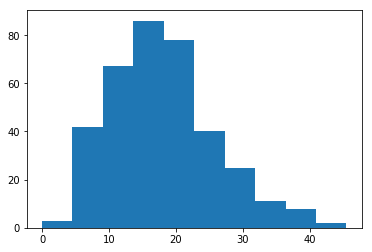

In [44]:
plt.hist(PSI_df['ENSG00000114416.13_20'].dropna())

## From duplicated samples, keeping highest coverage

In [116]:
#Getting median coverage
med_coverage_df = pd.DataFrame(coverage_df.median(axis=1))
#Abbreviated sample names
med_coverage_df['samples'] = ["-".join(i.split('-')[:2]) for i in coverage_df.index]
med_coverage_df['original_samples'] = med_coverage_df.index
#Take the maximum coverage sample
med_coverage_df.groupby('samples').max()
highest_cov_samples = list(med_coverage_df.groupby('samples').max()['original_samples'])
highest_cov_samples

['GTEX-1117F-0626-SM-5N9CS',
 'GTEX-111CU-0326-SM-5GZXO',
 'GTEX-111FC-1126-SM-5GZWU',
 'GTEX-111VG-0726-SM-5GIDC',
 'GTEX-111YS-0626-SM-5GZXV',
 'GTEX-1122O-0126-SM-5GICA',
 'GTEX-1128S-0726-SM-5N9D6',
 'GTEX-117YW-0526-SM-5H11C',
 'GTEX-117YX-1326-SM-5H125',
 'GTEX-11DXX-0626-SM-5Q5AG',
 'GTEX-11DXZ-0726-SM-5N9C4',
 'GTEX-11DZ1-0426-SM-5H11A',
 'GTEX-11EI6-0826-SM-5985V',
 'GTEX-11EMC-0126-SM-5EGKV',
 'GTEX-11EQ9-0226-SM-5A5JX',
 'GTEX-11GSP-0726-SM-5986L',
 'GTEX-11I78-0126-SM-5HL6F',
 'GTEX-11ILO-0726-SM-5HL5I',
 'GTEX-11LCK-0426-SM-5A5M8',
 'GTEX-11NSD-0326-SM-5A5LS',
 'GTEX-11NUK-0826-SM-5HL4U',
 'GTEX-11NV4-1126-SM-5HL6J',
 'GTEX-11O72-1326-SM-5BC5A',
 'GTEX-11OF3-1126-SM-5986C',
 'GTEX-11P7K-0326-SM-59871',
 'GTEX-11P81-0226-SM-5HL5M',
 'GTEX-11PRG-0926-SM-5EGI8',
 'GTEX-11TT1-1626-SM-5EQL7',
 'GTEX-11TUW-0526-SM-5LU9A',
 'GTEX-11UD2-0726-SM-5EQ69',
 'GTEX-11WQC-0626-SM-5EQMF',
 'GTEX-11WQK-1226-SM-5GU5Z',
 'GTEX-11ZTS-1226-SM-5EQMQ',
 'GTEX-11ZTT-0626-SM-5EQLM',
 'GTEX-11ZUS-0

In [117]:
PSI_df = PSI_df.dropna().loc[highest_cov_samples]
exons_to_remove = exon_too_few_reads
num_samples = len(PSI_df.index)
for exon in exons:
    exon_PSI = PSI_df[exon]
    num_zero = len(exon_PSI[exon_PSI == 0])
    num_hundred = len(exon_PSI[exon_PSI == 100])
    if num_zero/num_samples > 0.9 or num_hundred/num_samples > 0.9:
        exons_to_remove.append(exon)
exons_to_remove

/usr/lib/python3.4/site-packages/ipykernel/__main__.py:1: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  if __name__ == '__main__':


['ENSG00000114416.13_0',
 'ENSG00000114416.13_1',
 'ENSG00000114416.13_1',
 'ENSG00000114416.13_10',
 'ENSG00000114416.13_11',
 'ENSG00000114416.13_12',
 'ENSG00000114416.13_13',
 'ENSG00000114416.13_14',
 'ENSG00000114416.13_15',
 'ENSG00000114416.13_16',
 'ENSG00000114416.13_17',
 'ENSG00000114416.13_18',
 'ENSG00000114416.13_19',
 'ENSG00000114416.13_2',
 'ENSG00000114416.13_22',
 'ENSG00000114416.13_8',
 'ENSG00000114416.13_9',
 'ENSG00000114416.13_1',
 'ENSG00000114416.13_10',
 'ENSG00000114416.13_11',
 'ENSG00000114416.13_12',
 'ENSG00000114416.13_13',
 'ENSG00000114416.13_14',
 'ENSG00000114416.13_15',
 'ENSG00000114416.13_16',
 'ENSG00000114416.13_17',
 'ENSG00000114416.13_18',
 'ENSG00000114416.13_19',
 'ENSG00000114416.13_2',
 'ENSG00000114416.13_22',
 'ENSG00000114416.13_8',
 'ENSG00000114416.13_9']

In [120]:
PSI_df_filtered = PSI_df.drop(exons_to_remove,axis=1).dropna()
new_index = ["-".join(i.split('-')[:2]) for i in PSI_df_filtered.index]
PSI_df_filtered.index = new_index
PSI_df_filtered

,ENSG00000114416.13_20,ENSG00000114416.13_21,ENSG00000114416.13_3,ENSG00000114416.13_4,ENSG00000114416.13_5,ENSG00000114416.13_6,ENSG00000114416.13_7
GTEX-111CU,11.119206,70.205882,14.975111,0.000000,0.000000,100.000000,100.000000
GTEX-111FC,17.665380,64.635473,49.732082,1.561524,1.858736,99.739244,98.539802
GTEX-111VG,36.690257,70.830217,22.712934,0.000000,0.000000,99.778610,99.658966
GTEX-111YS,17.269309,65.914057,8.457048,0.000000,0.000000,100.000000,100.000000
GTEX-1122O,14.447653,70.882118,17.458547,1.739937,0.000000,100.000000,100.000000
GTEX-1128S,7.030796,71.299260,17.044476,0.000000,0.000000,100.000000,100.000000
GTEX-117YW,15.264594,66.543490,20.800462,0.000000,0.000000,100.000000,100.000000
GTEX-117YX,8.724085,73.915216,12.233148,0.000000,0.989120,100.000000,100.000000
GTEX-11DXX,22.311427,74.457770,26.222676,0.000000,0.000000,100.000000,100.000000
GTEX-11DXZ,14.229111,70.194295,4.494069,0.000000,0.000000,100.000000,100.000000


In [122]:
PSI_df_filtered.to_csv('FXR1_PSI.csv')

## Spot checking regression here:

In [3]:
expr = pd.read_csv('FXR1_PSI.csv',index_col=0)
strgt = pd.read_csv('/storage/szfeupe/Runs/650GTEx_estr/SNP_Analysis/chr3.tab', sep="\t", low_memory=False)
expr_annot = pd.read_csv('/storage/dana/spliceSTR/expression/gencode.v19.annotations_exons.csv')
expr_annot.index = expr_annot["probe.id"].values
expr_annot = expr_annot.loc[[item for item in expr.columns if item in expr_annot.index],:]
gene = 'ENSG00000114416.13_20'

In [8]:
expr_annot

,Unnamed: 0,gene.chr,gene.start,gene.stop,gene.id,gene.strand,probe.chr,probe.start,probe.stop,probe.id,probe.strand
ENSG00000114416.13_20,53435,chr3,180585929,180700541,ENSG00000114416.13,+,chr3,180688863,180688943,ENSG00000114416.13_20,+
ENSG00000114416.13_21,53436,chr3,180585929,180700541,ENSG00000114416.13,+,chr3,180693101,180693192,ENSG00000114416.13_21,+
ENSG00000114416.13_3,53418,chr3,180585929,180700541,ENSG00000114416.13,+,chr3,180632440,180632783,ENSG00000114416.13_3,+
ENSG00000114416.13_4,53419,chr3,180585929,180700541,ENSG00000114416.13,+,chr3,180633222,180633419,ENSG00000114416.13_4,+
ENSG00000114416.13_5,53420,chr3,180585929,180700541,ENSG00000114416.13,+,chr3,180645436,180645601,ENSG00000114416.13_5,+
ENSG00000114416.13_6,53421,chr3,180585929,180700541,ENSG00000114416.13,+,chr3,180651122,180651174,ENSG00000114416.13_6,+
ENSG00000114416.13_7,53422,chr3,180585929,180700541,ENSG00000114416.13,+,chr3,180652926,180653019,ENSG00000114416.13_7,+


In [ ]:
exon_df = pd.read_table(EXONFILE, index_col=0)
junction_df = pd.read_table(JUNCTIONFILE, index_col=0,
                                          sep='\t',
                                          skipinitialspace=True)')

In [13]:
STR = 180633485
str_samples = list(set(strgt.columns[2:].values))
samples_to_remove = []
for item in str_samples:
    if item not in expr.index: samples_to_remove.append(item) #str_samples.remove(item)
for item in samples_to_remove: str_samples.remove(item)
expr = expr.loc[str_samples,:]
cis_strs = strgt[strgt['start'] == STR].dropna(axis=0)

for j in range(cis_strs.shape[0]):
    # cis STR data
    locus_str = cis_strs.iloc[[j],:][str_samples].transpose()
    locus_str.index = str_samples
    locus_str.columns = ["STR_%s"%(cis_strs["start"].values[j])]
    test_str=locus_str.columns[0]
    str_start = cis_strs["start"].values[j]
    
samples_to_keep = [str_samples[k] for k in range(len(str_samples)) if str(locus_str.iloc[:,0].values[k]) != "None" and  str(locus_str.iloc[:,0].values[k]) != 'NA,NA']

locus_str = locus_str.loc[samples_to_keep,:]

y = pd.DataFrame({"expr":list(expr.loc[:, gene])})
y.index = str_samples
locus_y = y.loc[samples_to_keep,:]
Locus_data = locus_str.join(locus_y)

In [10]:
locus_str

,STR_180633485
GTEX-YFC4,0
GTEX-S4Q7,1
GTEX-13OVJ,0
GTEX-13RTJ,0
GTEX-OIZG,1
GTEX-ZEX8,1
GTEX-X4XY,1
GTEX-ZYWO,0
GTEX-P4QR,0
GTEX-145MN,0


/usr/lib64/python3.4/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


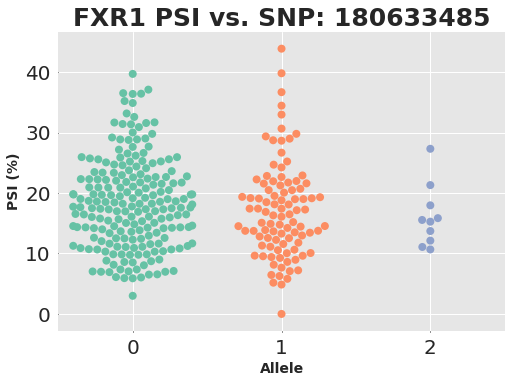

In [15]:
import seaborn as sns



flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
sns.set_style('darkgrid',{"axes.facecolor": "0.9",
                          'axes.grid' : True,
                          'grid.linestyle': u'-',
                          'xtick.major.size': 1,
                          'ytick.major.size': 0.5,})

sns.swarmplot(locus_str['STR_180633485'].astype(int),locus_y["expr"],palette= sns.color_palette("Set2"),size=8)
plt.xlabel('Allele',fontsize=14,fontweight='bold')
plt.ylabel('PSI (%)',fontsize=14,fontweight='bold')
plt.title('FXR1 PSI vs. SNP: {}'.format(STR),fontsize=25,fontweight='bold')
ax = plt.gca()
ax.grid(True)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.show()